## Business Questions
1. How are sales and profit trending over time?
2. Which categories and sub-categories generate the most and least profit?
3. How do discounts impact profitability?
4. Which regions and markets perform best and worst?
5. Does shipping cost affect profit margins and delivery?
6. Customer retention and purchase patterns over 2011-2014?
7. Product affinity and cross-selling opportunities?
8. Sales prediction using temporal and seasonal features?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path
import pandas as pd

# Notebook folder
notebook_folder = Path.cwd()  # Usually your Jupyter starts here

# Relative paths from notebook folder
raw_file = notebook_folder.parent / "data" / "raw" / "global_superstore.txt"
processed_file = notebook_folder.parent / "data" / "processed" / "global_superstore_cleaned.csv"

# Load data
store = pd.read_csv(processed_file)


In [3]:
from pathlib import Path

project_root = Path.cwd().parent

# Figures folder
figures_path = project_root / "outputs" / "figures"
figures_path.mkdir(parents=True, exist_ok=True)

# Tables folder
tables_path = project_root / "outputs" / "tables"
tables_path.mkdir(parents=True, exist_ok=True)

In [4]:
store.head()

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,state,sub-category,year,continent,weeknum,week_num,year_month,shipping_days,day_name,day_of_week
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,...,California,Paper,2011,North America,2,1,2011-01,2,Friday,5
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,...,California,Paper,2011,North America,4,3,2011-01,5,Friday,5
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,California,Paper,2011,North America,32,31,2011-08,4,Friday,5
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05,CA-2011-118962,Medium,...,California,Paper,2011,North America,32,31,2011-08,4,Friday,5
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29,CA-2011-146969,High,...,California,Paper,2011,North America,40,39,2011-09,4,Thursday,4


*KEY METRICS*

In [5]:
store[['sales', 'profit', 'quantity']].sum()

sales       1.264290e+07
profit      1.467457e+06
quantity    1.783120e+05
dtype: float64

In [6]:
store['order_id'].nunique()

25035

In [7]:
store['customer_id'].nunique()

4873

*Total sales = 12642900
Total profit = 14674570
Number of orders = 25035
Number of customers = 4873*

# 1. TIME BASED ANALYSIS

In [8]:
monthly = store.groupby('year_month')[['sales', 'profit']].sum()

In [9]:
monthly['sales_growth'] = monthly['sales'].pct_change()
monthly['profit_growth'] = monthly['profit'].pct_change()

# convert to string for claude prompt
monthly_summary = monthly.tail(12).to_string()

*Line plot of sales and profit*

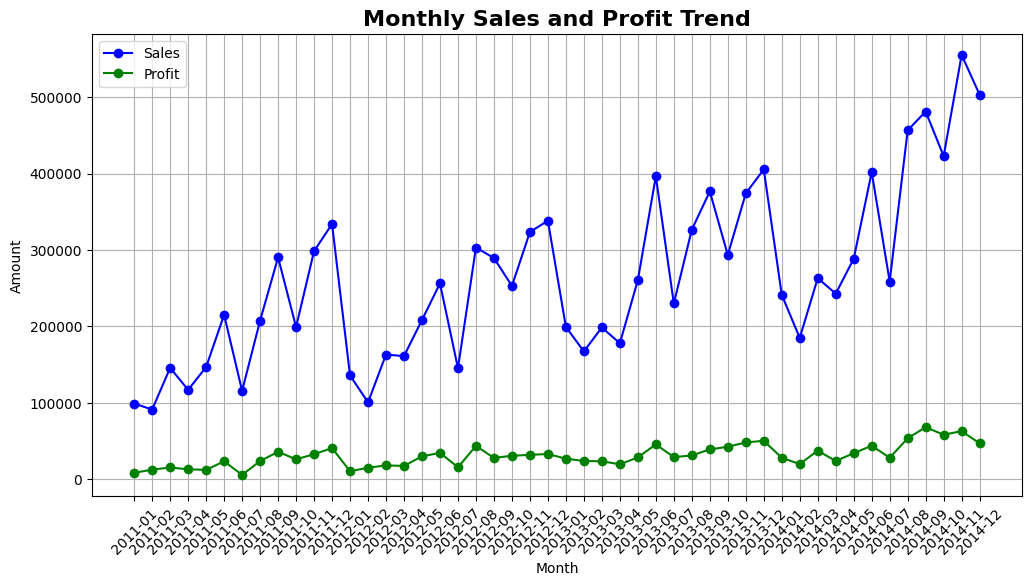

In [10]:
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['sales'], marker='o', label='Sales', color='blue')
plt.plot(monthly.index, monthly['profit'], marker='o', label='Profit', color='green')
plt.xlabel("Month")
plt.ylabel("Amount")
plt.title("Monthly Sales and Profit Trend", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.savefig(figures_path / "monthly_sales_profit_trend.png", bbox_inches='tight')
plt.show()

*monthly growth rates*

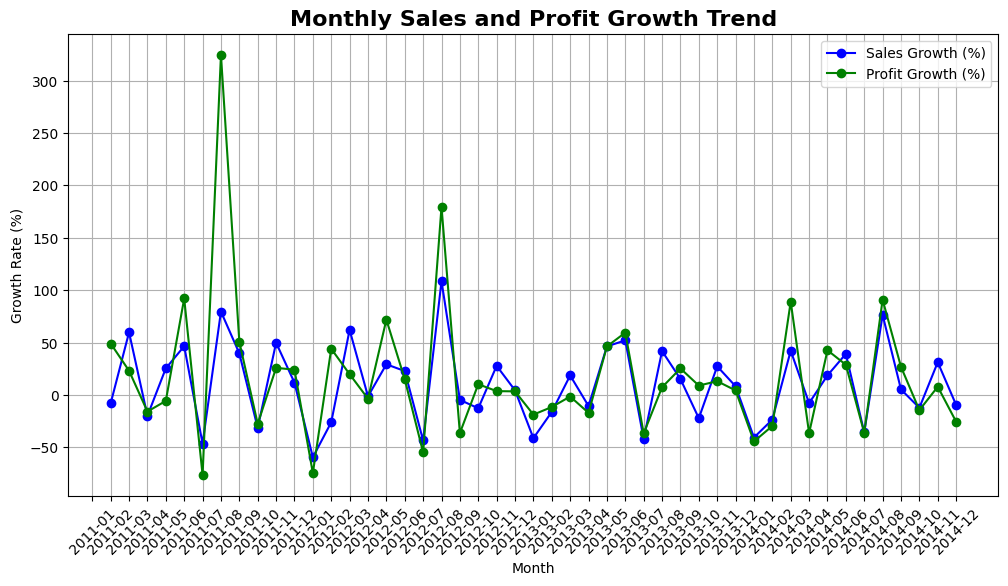

In [11]:
monthly['sales_growth'] = monthly['sales'].pct_change() * 100
monthly['profit_growth'] = monthly['profit'].pct_change() * 100

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['sales_growth'], marker='o', label='Sales Growth (%)', color='blue')
plt.plot(monthly.index, monthly['profit_growth'], marker='o', label='Profit Growth (%)', color='green')
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.title("Monthly Sales and Profit Growth Trend", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.savefig(figures_path / "monthly_sales_profit_growth_trend.png", bbox_inches='tight')
plt.show()

*Separate plots for Sales & Profit trend*

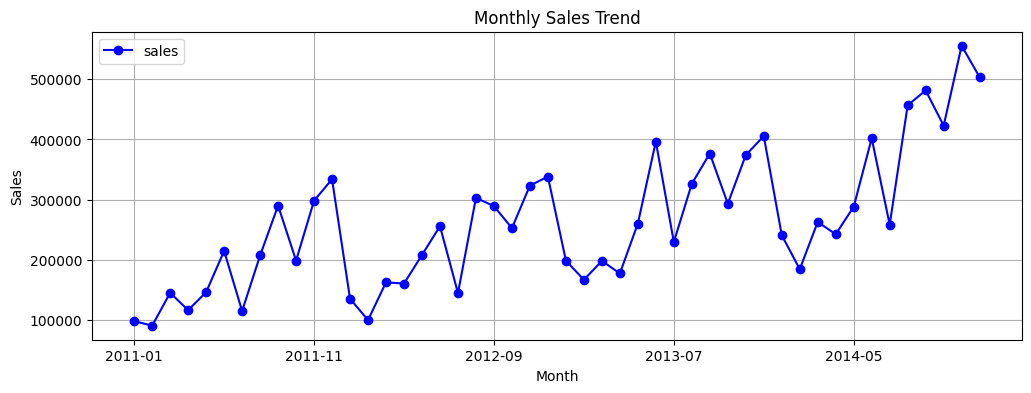

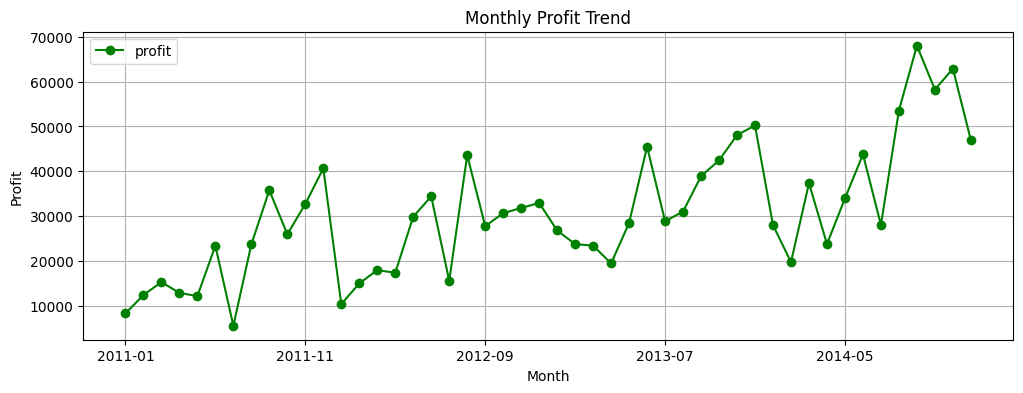

In [12]:
monthly[['sales']].plot(figsize=(12,4), color='blue', title='Monthly Sales Trend', marker='o')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)

plt.savefig(figures_path / "monthly_sales_trend.png", bbox_inches='tight')
plt.show()

monthly[['profit']].plot(figsize=(12,4), color='green', title='Monthly Profit Trend', marker='o')
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(True)

plt.savefig(figures_path / "monthly_profit_trend.png", bbox_inches='tight')
plt.show()

### OBSERVATION

How are sales and profit trending over time?

1. Monthly sales and profit are generally increasing over time.

2. Profit does not always grow proportionally with sales, indicating costs (like shipping) affect margins.

3. Higher shipping costs and certain shipping modes (e.g., Express) are linked to lower profit margins.

4. Optimizing shipping strategy and monitoring high-cost periods can improve overall profitability.

# 2. CATERGORY & SUB-CATEGORY ANALYSIS

*Top and bottom categories*

In [13]:
category_profit = store.groupby('category')['profit'].sum()

print("Most Profitable Category:")
print(category_profit.idxmax(), "-", category_profit.max())

print("\nLeast Profitable Category:")
print(category_profit.idxmin(), "-", category_profit.min())

Most Profitable Category:
Technology - 663778.73318

Least Profitable Category:
Furniture - 285204.7238


*Top and bottom sub-categories*

In [14]:
# Your original code stays the same
subcat_profit = store.groupby('sub-category')['profit'].sum().sort_values()

# Convert to table in one line
subcat_profit_table = subcat_profit.reset_index()
subcat_profit_table.columns = ['Sub-Category', 'Total Profit']

subcat_profit_table.to_csv(tables_path / "profit_by_subcategory.csv", index=False)

# Display the table in notebook
subcat_profit_table

,Sub-Category,Total Profit
0,Tables,-64083.38870
1,Fasteners,11525.42410
2,Labels,15010.51200
3,Supplies,22583.26310
4,Envelopes,29601.11630
5,Furnishings,46967.42550
6,Art,57953.91090
7,Machines,58867.87300
8,Paper,59207.68270
9,Binders,72449.84600


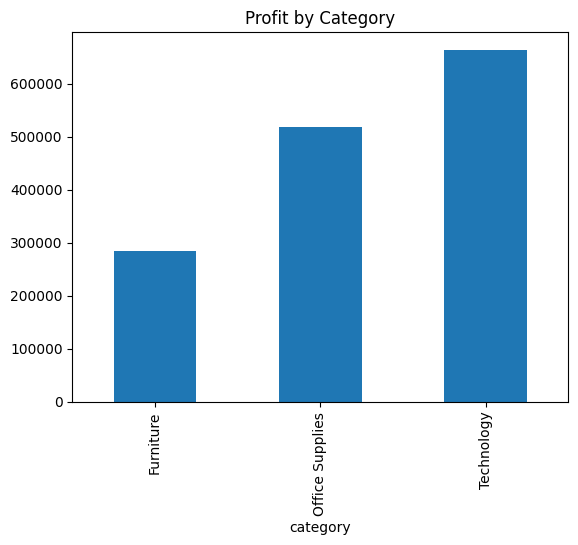

In [15]:
store.groupby('category')['profit'].sum().plot(kind='bar')
plt.title("Profit by Category")

plt.savefig(figures_path / "profit_by_category.png", bbox_inches='tight')
plt.show()

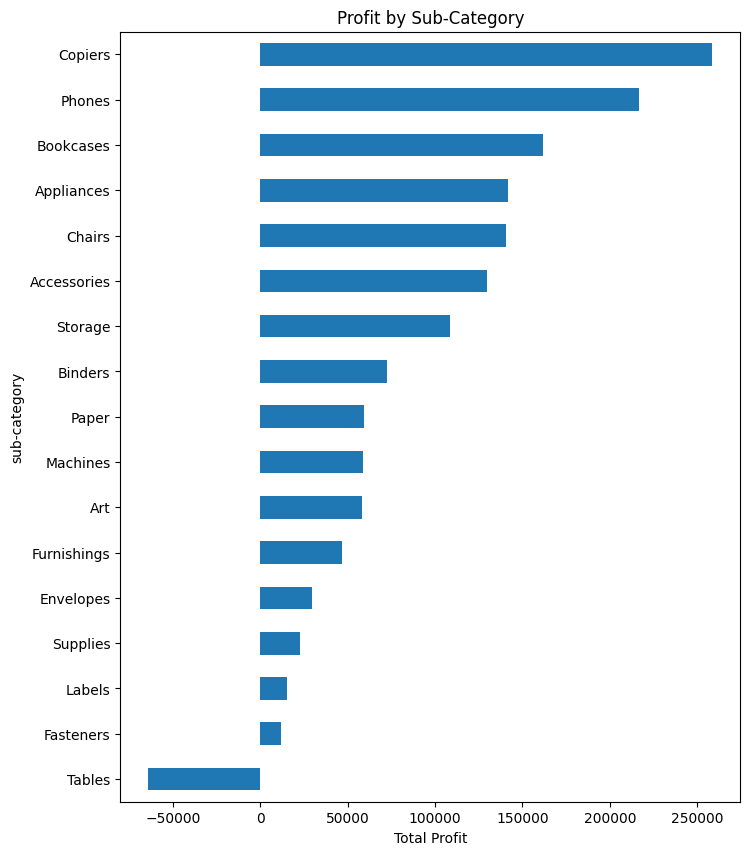

In [16]:
subcat_profit.plot(kind='barh', figsize=(8,10))
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")

plt.savefig(figures_path / "profit_by_subcategory.png", bbox_inches='tight')
plt.show()

In [17]:
store['profit_margin'] = store['profit'] / store['sales']
store['profit_margin'] = store['profit_margin'].replace([float('inf'), -float('inf')], None)

In [18]:
margin_category = store.groupby('category')['profit_margin'].mean().dropna()

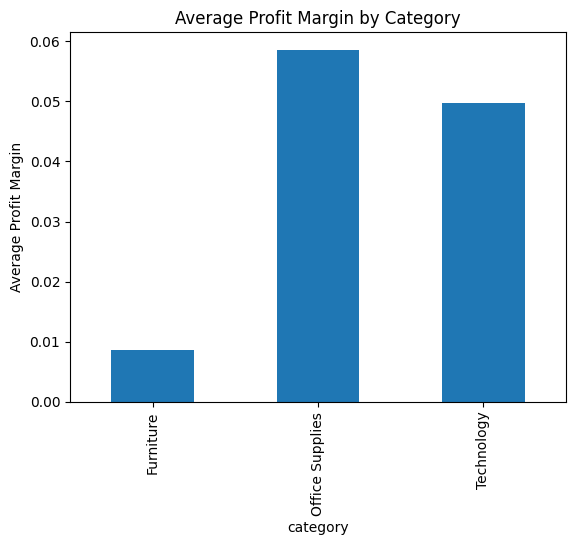

In [19]:
margin_category.plot(kind='bar')
plt.title("Average Profit Margin by Category")
plt.ylabel("Average Profit Margin")

plt.savefig(figures_path / "average_profit_margin_by_category.png", bbox_inches='tight')
plt.show()

In [20]:
# sub_category with negative profit

subcat_profit[subcat_profit < 0]

sub-category
Tables   -64083.3887
Name: profit, dtype: float64

In [21]:
#text summary for claude prompt
# Most and least profitable categories
most_profitable_cat = f"{category_profit.idxmax()} - ${category_profit.max():,.0f}"
least_profitable_cat = f"{category_profit.idxmin()} - ${category_profit.min():,.0f}"

In [22]:
# Top/bottom 5 sub-categories
top5_subcat = subcat_profit.tail(5).round(2).to_string()
bottom5_subcat = subcat_profit.head(5).round(2).to_string()


In [23]:
# Negative profit sub-categories
neg_subcat = subcat_profit[subcat_profit < 0].round(2).to_string()

In [24]:
# Average profit margin by category
margin_text = margin_category.round(2).to_string()

### OBSERVATION

Which categories and sub-categories generate the most and least profit?

1. Technology generates the highest overall profit among categories.

2. Furniture contributes the least profit and shows weaker margins.

3. Certain sub-categories (e.g., Tables) generate negative profit, indicating pricing or cost issues.

4. High sales volume does not always translate into high profitability.

# 3. DISCOUNT IMPACT ANALYSIS

*discount vs profit*

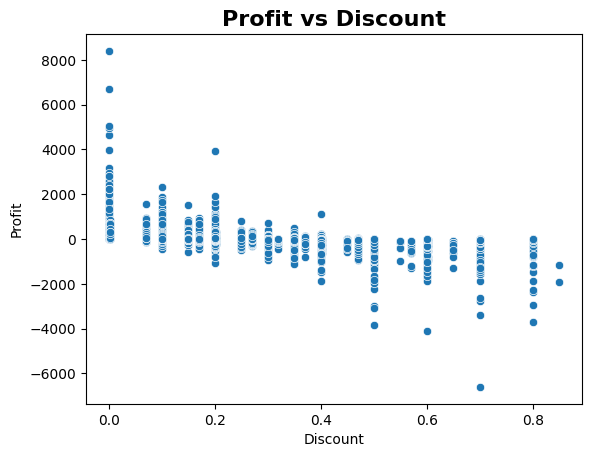

In [25]:
sns.scatterplot(x='discount', y='profit', data=store)
plt.title("Profit vs Discount", fontsize=16, fontweight='bold')
plt.xlabel("Discount")
plt.ylabel("Profit")

plt.savefig(figures_path / "profit_vs_discount", bbox_inches='tight')
plt.show()

*high vs low discount*

In [26]:
store['discount band'] = store['discount'].apply(lambda x: 'High' if x > 0.3 else 'Low')

store.groupby('discount band')['profit'].mean()

discount band
High   -76.587827
Low     55.241608
Name: profit, dtype: float64

*Profit Margin Analysis*

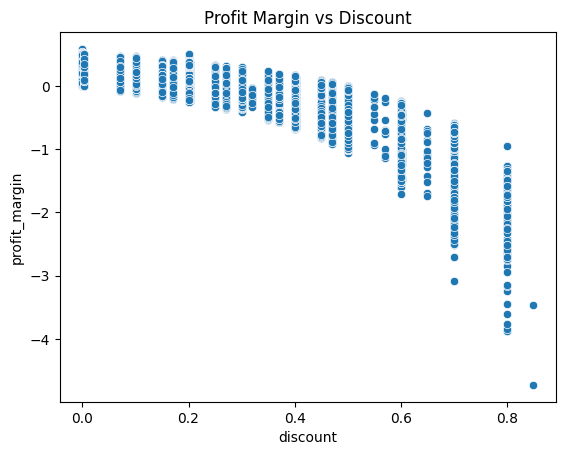

In [27]:
store['profit_margin'] = store['profit'] / store['sales']

sns.scatterplot(x='discount', y='profit_margin', data=store)
plt.title("Profit Margin vs Discount")

plt.savefig(figures_path / "profit_margin_vs_discount.png", bbox_inches='tight')
plt.show()

*Boxplot by Discount Band*

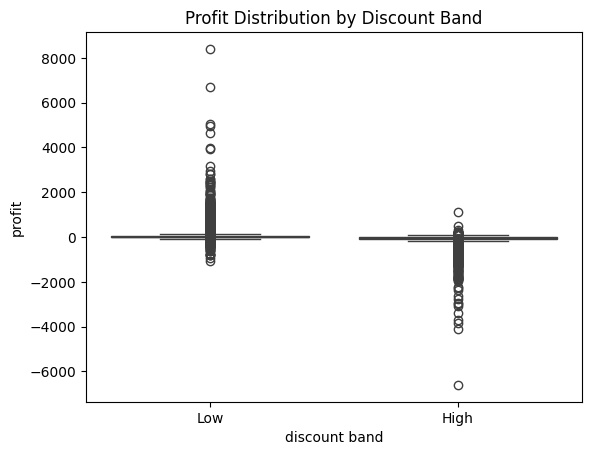

In [28]:
sns.boxplot(x='discount band', y='profit', data=store)
plt.title("Profit Distribution by Discount Band")

plt.savefig(figures_path / "profit_distribution_by_discount_band.png", bbox_inches='tight')
plt.show()

*correlation*

In [29]:
store[['discount','profit']].corr()

,discount,profit
discount,1.00000,-0.31649
profit,-0.31649,1.00000


In [30]:
store[['discount','profit_margin']].corr()

,discount,profit_margin
discount,1.000000,-0.846444
profit_margin,-0.846444,1.000000


*Discount Impact on Sales*

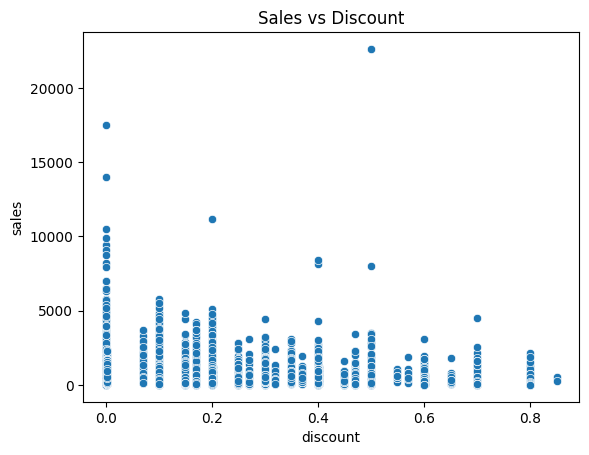

In [31]:
sns.scatterplot(x='discount', y='sales', data=store)
plt.title("Sales vs Discount")

plt.savefig(figures_path / "sales_vs_discount.png", bbox_inches='tight')
plt.show()

### OBSERVATION

How do discounts impact profitability?

1. Higher discounts are associated with lower profits.

2. Profit margin decreases significantly at higher discount levels. 

3. High-discount orders show higher variability and more negative profit instances. A discount greater than 50% always resulted in loss.

4. Discounts may increase sales volume but reduce profitability.

# 4. REGIONAL AND MARKET ANALYSIS

*Profit by region*

In [32]:
region_profit = store.groupby('region')['profit'].sum().sort_values()

# Create a table from the Series
region_profit_table = region_profit.reset_index()
region_profit_table.columns = ['Region', 'Total Profit']


region_profit_table.to_csv(tables_path / "profit_by_region.csv", index=False)

# Display the table in notebook
region_profit_table

,Region,Total Profit
0,Canada,17817.39000
1,Southeast Asia,17852.32900
2,Caribbean,34571.32104
3,EMEA,43897.97100
4,Africa,88871.63100
5,East,91522.78000
6,West,108418.44890
7,Oceania,120089.11200
8,Central Asia,132480.18700
9,South,140355.76618


*Profit margin by market*

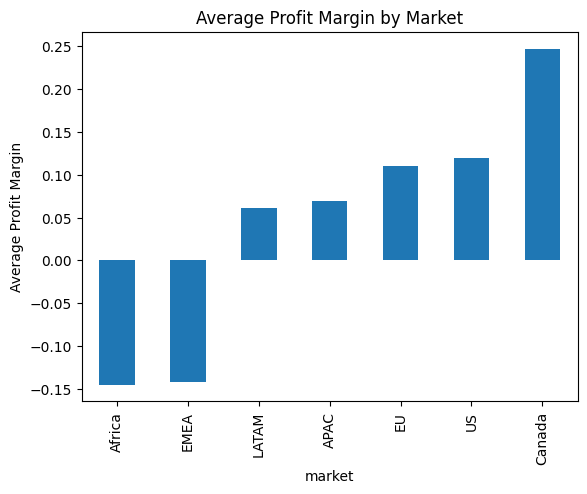

In [33]:
# Compute and plot average profit margin by market, ignoring zero sales
(store.loc[store['sales'] > 0]
     .assign(profit_margin=lambda x: x['profit'] / x['sales'])
     .groupby('market')['profit_margin']
     .mean()
     .sort_values()
     .plot(kind='bar', title="Average Profit Margin by Market", ylabel="Average Profit Margin")
)
plt.savefig(figures_path / "average_profit_margin.png", bbox_inches='tight')
plt.show()

*Best & Worst performing market and region*

In [34]:
region_profit = store.groupby('region')['profit'].sum()

print("Best Performing Region:", region_profit.idxmax())
print("Worst Performing Region:", region_profit.idxmin())

market_profit = store.groupby('market')['profit'].sum()

print("Best Performing Market:", market_profit.idxmax())
print("Worst Performing Market:", market_profit.idxmin())

Best Performing Region: Central
Worst Performing Region: Canada
Best Performing Market: APAC
Worst Performing Market: Canada


*Profit by market*

In [35]:
store.groupby('market')['profit'].sum().sort_values()

market_profit_table = market_profit.reset_index()
market_profit_table.columns = ['Market', 'Total Profit']
market_profit_table

,Market,Total Profit
0,APAC,436000.04900
1,Africa,88871.63100
2,Canada,17817.39000
3,EMEA,43897.97100
4,EU,372829.74150
5,LATAM,221643.48708
6,US,286397.02170


In [36]:
market_profit_table.to_csv(tables_path / "profit_by_market.csv", index=False)

*Total Sales vs Total Profit across different Markets*

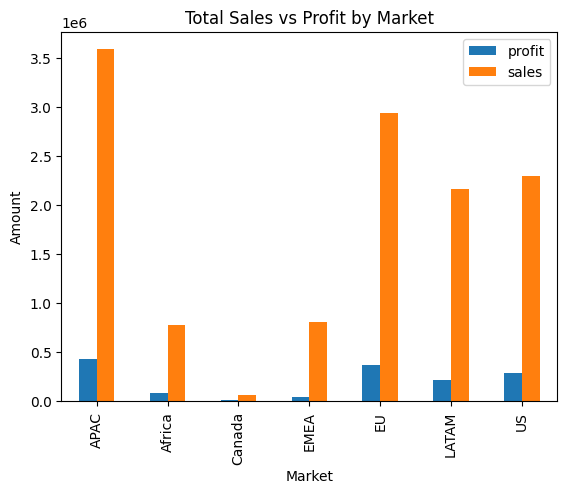

In [37]:
store.groupby('market')[['profit','sales']].sum().plot(kind='bar')

plt.title("Total Sales vs Profit by Market")
plt.xlabel("Market")
plt.ylabel("Amount")

plt.savefig(figures_path / "total_sales_vs_profit_by_margin.png", bbox_inches='tight')
plt.show()

### OBSERVATION

1. Certain regions (APAC)  generate the highest sales; however, high revenue does not always translate into the highest profit, possibly due to higher discounts or shipping costs.

2. Markets (Canada & EU) show strong profitability despite moderate sales, indicating better cost control and operational efficiency.

3. Overall, performance varies across regions and markets, highlighting opportunities to optimize pricing and cost strategies in lower-performing areas.

# 5. shipping cost affect profit margins?

*Profit vs Shipping Cost by Market (dual-axis)*

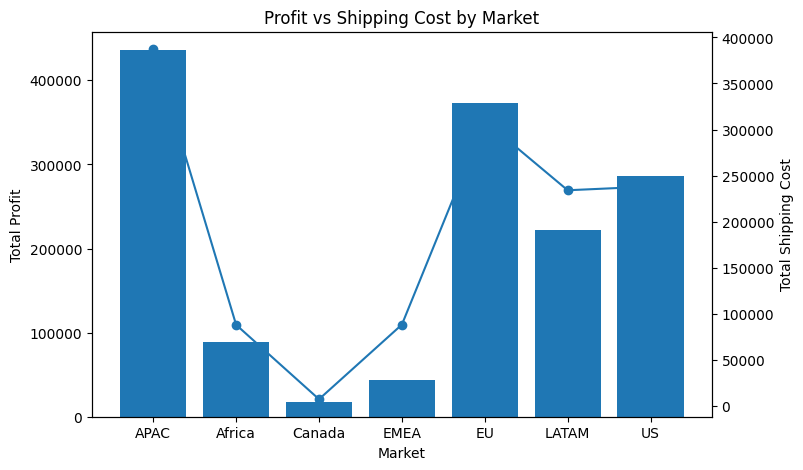

In [38]:
grouped = store.groupby('market')[['profit', 'shipping_cost']].sum() 

# Create figure and primary axis 
fig, ax1 = plt.subplots(figsize=(8,5)) 

# Profit as bar plot 
ax1.bar(grouped.index, grouped['profit']) 
ax1.set_xlabel("Market") 
ax1.set_ylabel("Total Profit") 
ax1.set_title("Profit vs Shipping Cost by Market") 

# Secondary axis for shipping cost 
ax2 = ax1.twinx() 
ax2.plot(grouped.index, grouped['shipping_cost'], marker='o') 
ax2.set_ylabel("Total Shipping Cost") 

plt.savefig(figures_path / "profit_vs_shipping_cost_by_market.png", bbox_inches='tight')
plt.show()

*Scatter plot: Profit vs Shipping Cost (order-level)*

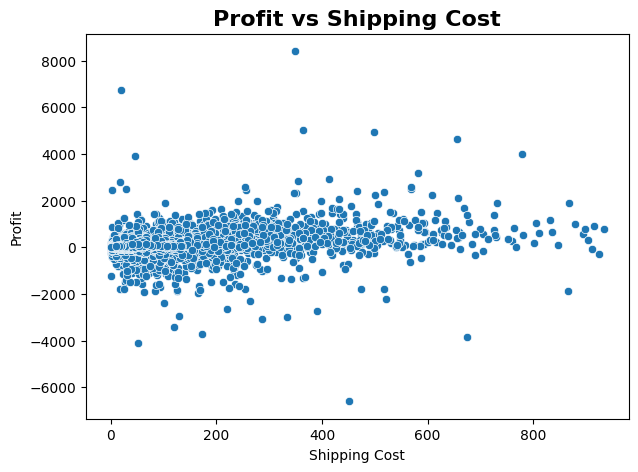

In [39]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='shipping_cost', y='profit', data=store)

plt.title("Profit vs Shipping Cost", fontsize=16, fontweight='bold')
plt.xlabel("Shipping Cost")
plt.ylabel("Profit")

plt.savefig(figures_path / "profit_vs_shipping_cost.png", bbox_inches='tight')
plt.show()

*Scatter plot: Profit Margin vs Shipping Cost*

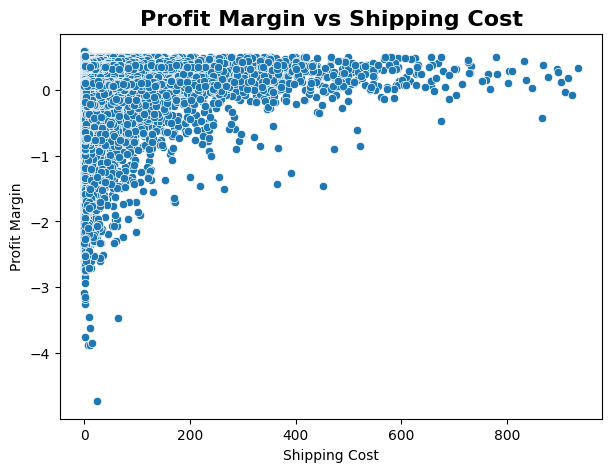

In [40]:
store['profit_margin'] = store['profit'] / store['sales']

plt.figure(figsize=(7,5))
sns.scatterplot(x='shipping_cost', y='profit_margin', data=store)
plt.title("Profit Margin vs Shipping Cost", fontsize=16, fontweight='bold')
plt.xlabel("Shipping Cost")
plt.ylabel("Profit Margin")

plt.savefig(figures_path / "profit_margin_vs_shipping_cost.png", bbox_inches='tight')
plt.show()

*Boxplot: Profit distribution by shipping mode*

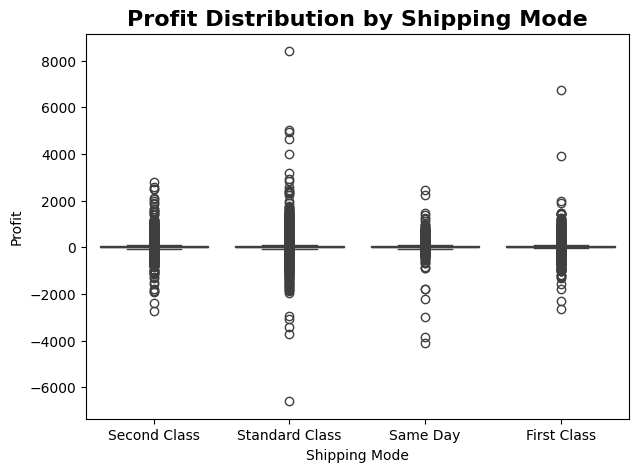

In [41]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ship_mode', y='profit', data=store)
plt.title("Profit Distribution by Shipping Mode", fontsize=16, fontweight='bold')
plt.xlabel("Shipping Mode")
plt.ylabel("Profit")

plt.savefig(figures_path / "profit_distribution_by_shipping_mode.png", bbox_inches='tight')
plt.show()

*Boxplot: Shipping Cost distribution by shipping mode*

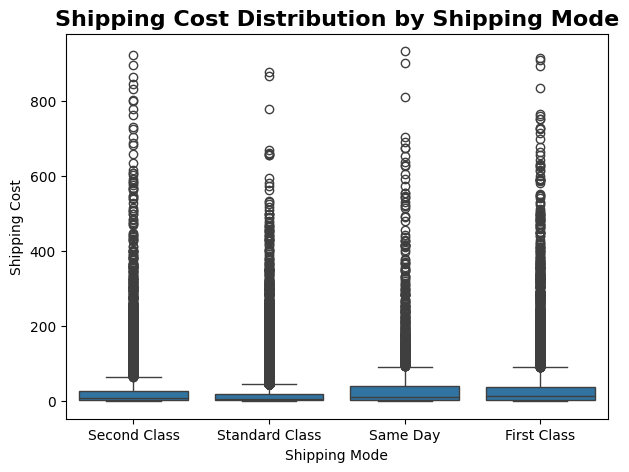

In [42]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ship_mode', y='shipping_cost', data=store)
plt.title("Shipping Cost Distribution by Shipping Mode", fontsize=16, fontweight='bold')
plt.xlabel("Shipping Mode")
plt.ylabel("Shipping Cost")

plt.savefig(figures_path / "shipping_cost_distribution_by_shipping_mode.png", bbox_inches='tight')
plt.show()

*Numeric correlation between profit, shipping cost, and profit margin*

In [43]:
corr = store[['profit', 'shipping_cost', 'profit_margin']].corr()
print("Correlation matrix:\n", corr)

Correlation matrix:
                  profit  shipping_cost  profit_margin
profit         1.000000       0.354441       0.357290
shipping_cost  0.354441       1.000000       0.067667
profit_margin  0.357290       0.067667       1.000000


In [44]:
corr_table = corr.copy()

corr_table.to_csv(tables_path / "correlation_matrix.csv")
corr_table

,profit,shipping_cost,profit_margin
profit,1.000000,0.354441,0.357290
shipping_cost,0.354441,1.000000,0.067667
profit_margin,0.357290,0.067667,1.000000


### OBSERVATION

Does shipping cost affect profit margins and delivery?
   
1. Markets with high shipping costs often show lower profits → reduces profit margin.

2. Certain shipping modes (like Express) may have higher costs, which impacts margins.

3. Profit is influenced by both order size (sales) and shipping cost, but profit margin is relatively independent of shipping cost.

4. Business recommendation: optimize shipping strategy for high-cost markets to protect margins.

# 6. CUSTOMER RETENTION AND PURCHASE PATTERNS

*customer retention*

In [45]:
store['order_date'] = pd.to_datetime(store['order_date'])

In [46]:
store['year'] = store['order_date'].dt.year

In [47]:
customer_year = store.groupby(['customer_id','year'])['order_id'].nunique().reset_index()

In [48]:
customer_pivot = customer_year.pivot(index='customer_id',
                                     columns='year',
                                     values='order_id').fillna(0)

In [49]:
retention_results = {}

years = [2011, 2012, 2013, 2014]

for i in range(len(years)-1):
    current_year = years[i]
    next_year = years[i+1]
    
    retained = customer_pivot[
        (customer_pivot[current_year] > 0) &
        (customer_pivot[next_year] > 0)
    ].shape[0]
    
    total = customer_pivot[customer_pivot[current_year] > 0].shape[0]
    
    retention_results[f"{current_year}-{next_year}"] = retained / total

retention_results

{'2011-2012': 0.6743944636678201,
 '2012-2013': 0.7584107657801986,
 '2013-2014': 0.8201058201058201}

In [50]:
retention_table = pd.DataFrame(
    list(retention_results.items()),
    columns=['Year Pair', 'Retention Rate']
)

retention_table.to_csv(tables_path / "retention_results.csv", index=False)

retention_table

,Year Pair,Retention Rate
0,2011-2012,0.674394
1,2012-2013,0.758411
2,2013-2014,0.820106


*purchase patterns*

In [51]:
purchase_freq = store.groupby(['year','customer_id'])['order_id'].nunique().reset_index()

In [52]:
avg_freq = purchase_freq.groupby('year')['order_id'].mean()

avg_freq_table = avg_freq.reset_index()
avg_freq_table.columns = ['Year', 'Average Purchase Frequency']

avg_freq_table.to_csv(tables_path / "average_purchase_frequency.csv", index=False)
avg_freq_table

,Year,Average Purchase Frequency
0,2011,1.562630
1,2012,1.755847
2,2013,1.918686
3,2014,2.245947


*Visualize Retention Trend*

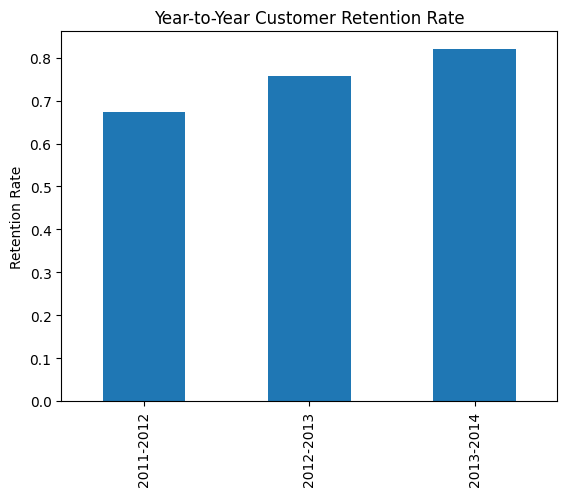

In [53]:
pd.Series(retention_results).plot(kind='bar')
plt.title("Year-to-Year Customer Retention Rate")
plt.ylabel("Retention Rate")

plt.savefig(figures_path / "year_to_year_customer_retention_rate.png", bbox_inches='tight')
plt.show()

*Visualize Purchase Frequency*

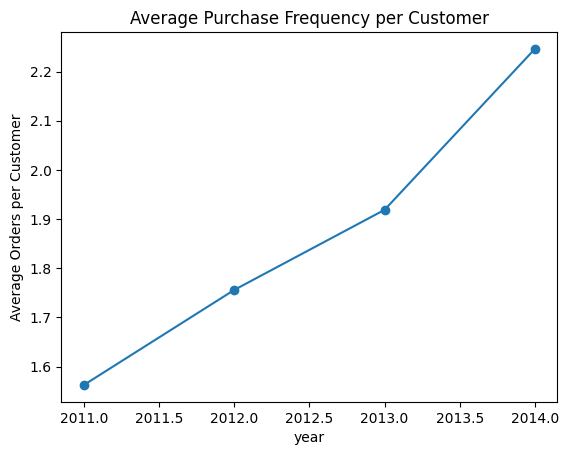

In [54]:
avg_freq.plot(marker='o')
plt.title("Average Purchase Frequency per Customer")
plt.ylabel("Average Orders per Customer")

plt.savefig(figures_path / "average_purchase_frequency_per_customer.png", bbox_inches='tight')
plt.show()

*Identify New vs Returning Customers*

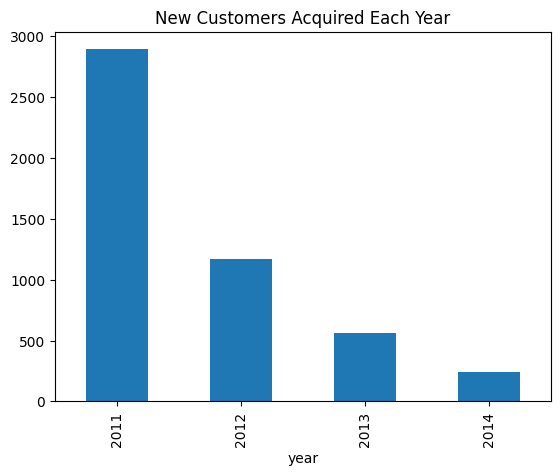

In [55]:
first_purchase = store.groupby('customer_id')['year'].min().reset_index()
new_customers = first_purchase.groupby('year').size()

new_customers.plot(kind='bar')
plt.title("New Customers Acquired Each Year")

plt.savefig(figures_path / "new_customers_acquired_each_year.png", bbox_inches='tight')
plt.show()

### OBSERVATION

1. Customer retention rates show a consistent upward trend from 2011 to 2014, indicating improving customer loyalty over time.

2. The increasing retention percentages suggest that more customers are returning in subsequent years.

3. Average purchase frequency per customer also rises gradually, reflecting stronger engagement and repeat purchasing behavior.

4. Overall, the business demonstrates positive customer relationship growth, with both retention and purchase activity improving year over year.

5. However, the business is attracting fewer new customers every year to the store with a drop of 91% over 4 years. 

# 7. Product affinity and cross-selling opportunities

In [56]:
pairs_df = store.merge(store, on='order_id')

In [57]:
#removing same product pairs

pairs_df = pairs_df[pairs_df['product_name_x'] != pairs_df['product_name_y']]

In [58]:
#Rename columns
pairs_df = pairs_df.rename(columns={'product_name_x': 'product_1', 'product_name_y': 'product_2'})

*product affinity*

In [59]:
total_orders = store['order_id'].nunique()
pair_counts = pairs_df.groupby(['product_1', 'product_2']).size().reset_index(name='count')
pair_counts['support'] = pair_counts['count'] / total_orders

print("Top 10 Product Affinity Pairs by Support:")

Top 10 Product Affinity Pairs by Support:


In [60]:
pair_counts_table = pair_counts.copy()
pair_counts_table.to_csv(tables_path / "product_affinity_pairs.csv", index=False)


pair_counts_table.sort_values('support', ascending=False).head(10)

,product_1,product_2,count,support
66811,Newell 34,Staples,4,0.00016
92742,Staples,Newell 34,4,0.00016
9672,"Avery 3-Hole Punch, Recycled","Sanford Pencil Sharpener, Easy-Erase",3,0.00012
49560,"Harbour Creations Steel Folding Chair, Set of Two","Binney & Smith Pens, Water Color",3,0.00012
11222,"Avery Binding Machine, Recycled","Smead Shelving, Blue",3,0.00012
17399,"Binney & Smith Highlighters, Water Color","Tenex Light Bulb, Duo Pack",3,0.00012
8645,"Apple Office Telephone, with Caller ID","Sharp Copy Machine, Color",3,0.00012
34127,"Eldon File Cart, Single Width","Stanley Sketch Pad, Easy-Erase",3,0.00012
1191,"Acco Binder, Clear","Acco Binding Machine, Recycled",3,0.00012
52180,Hon Olson Stacker Chairs,Staples,3,0.00012


*cross selling*

In [61]:
product_counts = store['product_name'].value_counts()

In [62]:
pair_counts['confidence_A_to_B'] = pair_counts['count'] / pair_counts['product_1'].map(product_counts)

print("\nTop 10 Cross-selling Opportunities by Confidence:")

cross_sell_table = pair_counts.copy()

cross_sell_table.to_csv(tables_path / "cross_selling_opportunities.csv", index=False)
cross_sell_table.sort_values('confidence_A_to_B', ascending=False).head(10)


Top 10 Cross-selling Opportunities by Confidence:


,product_1,product_2,count,support,confidence_A_to_B
16536,"Bevis Coffee Table, with Bottom Storage","Breville Coffee Grinder, White",1,0.00004,1.0
66829,Newell 342,Fellowes Bankers Box Recycled Super Stor/Drawer,1,0.00004,1.0
66828,Newell 342,Boston 1645 Deluxe Heavier-Duty Electric Penci...,1,0.00004,1.0
66827,Newell 342,Belkin Grip Candy Sheer Case / Cover for iPhon...,1,0.00004,1.0
66826,Newell 342,50 Colored Long Pencils,1,0.00004,1.0
16539,"Bevis Coffee Table, with Bottom Storage","Safco Floating Shelf Set, Pine",1,0.00004,1.0
16538,"Bevis Coffee Table, with Bottom Storage","Ibico Hole Reinforcements, Recycled",1,0.00004,1.0
66830,Newell 342,Newell 345,1,0.00004,1.0
16537,"Bevis Coffee Table, with Bottom Storage","Cardinal 3-Hole Punch, Clear",1,0.00004,1.0
102998,Xerox 1926,Balt Solid Wood Round Tables,1,0.00004,1.0


*Market level affinity*

In [63]:
market_affinity = store.groupby(['market','product_name'])['order_id'].count().reset_index(name='count')
print("\nMarket-level Product Counts:")

market_affinity_table = market_affinity.copy()
market_affinity_table.to_csv(tables_path / "market_product_counts.csv", index=False)

market_affinity_table.sort_values(['market','count'], ascending=[True, False]).head(20)


Market-level Product Counts:


,market,product_name,count
1801,APAC,"Stockwell Paper Clips, Assorted Sizes",26
472,APAC,"Cardinal Index Tab, Clear",24
621,APAC,"Eldon File Cart, Single Width",20
973,APAC,"Hon Executive Leather Armchair, Adjustable",19
90,APAC,"Advantus Paper Clips, Assorted Sizes",17
712,APAC,"Enermax Numeric Keypad, Bluetooth",17
1058,APAC,"Ibico Index Tab, Clear",17
1391,APAC,"Office Star Executive Leather Armchair, Adjust...",17
1804,APAC,"Stockwell Push Pins, 12 Pack",17
1510,APAC,"SAFCO Rocking Chair, Black",16


### OBSERVATION

1. Product Affinity: Most product pairs are purchased together very rarely; “Newell 34 & Staples” is the top pair but with very low support.

2. Cross-Selling: Many pairs show high confidence (1.0) but very low order counts, meaning niche or one-off combinations.

3. Market-Level Affinity: In APAC, office supplies and furniture (paper clips, chairs, carts) dominate, showing region-specific preferences.

4. Insight: Focus cross-selling on high-support pairs and market-specific bundles for meaningful impact rather than low-volume niche pairs.

# 8. Sales prediction

In [64]:
store['order_date'] = pd.to_datetime(store['order_date'])

In [65]:
# Daily sales
daily_sales = store.groupby('order_date')['sales'].sum().reset_index()

In [66]:
# Temporal features
daily_sales['day_of_week'] = daily_sales['order_date'].dt.weekday
daily_sales['month'] = daily_sales['order_date'].dt.month

In [67]:
# 7-day rolling trend
daily_sales['trend'] = daily_sales['sales'].rolling(window=7, min_periods=1).mean()

In [68]:
#Weekly seasonality factor
dow_avg = daily_sales.groupby('day_of_week')['sales'].mean()
daily_sales['dow_factor'] = daily_sales['day_of_week'].map(dow_avg) / daily_sales['sales'].mean()

In [69]:
# Monthly seasonality factor
month_avg = daily_sales.groupby('month')['sales'].mean()
daily_sales['month_factor'] = daily_sales['month'].map(month_avg) / daily_sales['sales'].mean()

In [70]:
# Predicted sales = trend * weekly factor * monthly factor
daily_sales['predicted_sales'] = daily_sales['trend'] * daily_sales['dow_factor'] * daily_sales['month_factor']

In [71]:
# MAE
daily_sales['error'] = abs(daily_sales['sales'] - daily_sales['predicted_sales'])
mae = daily_sales['error'].mean()
print("Mean Absolute Error (MAE):", round(mae,2))

Mean Absolute Error (MAE): 3588.32


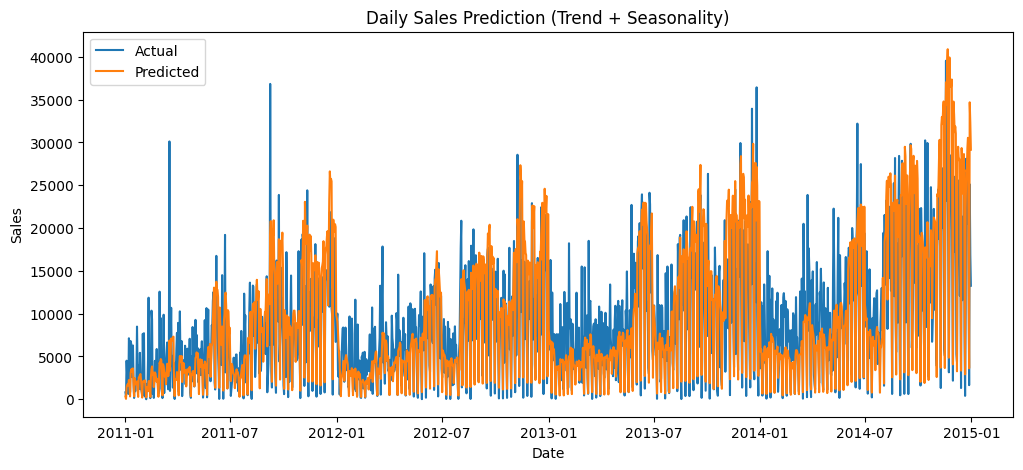

In [72]:
# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(daily_sales['order_date'], daily_sales['sales'], label='Actual')
plt.plot(daily_sales['order_date'], daily_sales['predicted_sales'], label='Predicted')
plt.legend()
plt.title("Daily Sales Prediction (Trend + Seasonality)")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.savefig(figures_path / "daily_sales_prediction.png", bbox_inches='tight')
plt.show()

### OBSERVATION

1. The simple trend + seasonal model captures the overall sales pattern well.

2. The Mean Absolute Error (MAE) of 3,588 indicates that, on average, daily sales predictions deviate from actual sales by this amount.

3. Despite minor deviations, the model effectively reflects weekly and monthly seasonality, making it useful for short-term planning and forecasting.

# Executive Summary

This end-to-end retail analysis combined descriptive, diagnostic, and predictive modeling to evaluate business performance from 2011–2014.

Sales increased from approximately $241K to $555K monthly (≈130% growth), with strong seasonality in Q4. However, profit volatility indicates margin instability during high-revenue periods. Category analysis shows Technology as the top profit driver (~$663K), while sub-categories such as Tables generate significant losses (~$64K negative impact), materially affecting overall margins.

Discount analysis reveals a strong negative correlation (~-0.85) between discount and profit margin, confirming that aggressive discounting directly erodes profitability. Transactions above 30% discount produce negative average profit, indicating structural pricing inefficiency.

Regional analysis highlights APAC (~$436K) and EU (~$373K) as strongest profit contributors, while the US shows high sales but weaker margins, signaling operational inefficiencies rather than demand limitations.

Customer metrics demonstrate improving retention (67% → 82%) and increasing purchase frequency (1.56 → 2.25 orders/customer/year), indicating strengthening customer lifetime value dynamics.

The time-series forecasting model (trend + seasonal factors) achieved a Mean Absolute Error ≈ $3.6K/day, providing reasonable short-term planning accuracy, though more advanced models (ARIMA/Prophet) could enhance precision.

Overall, the analysis identifies three primary optimization levers:

1.Discount control and pricing governance

2.Elimination or restructuring of loss-making sub-categories

3.Margin improvement in underperforming markets

These interventions present significant potential for sustainable profit expansion while maintaining revenue growth momentum.

## Claude Integration

In [73]:
import os
from dotenv import load_dotenv
from anthropic import Anthropic

# Load environment variables from .env
load_dotenv()

# Now get the API key
api_key = os.getenv("ANTHROPIC_API_KEY")
client = Anthropic(api_key=api_key)

# Test
print("API key loaded:", bool(api_key))  # Should print True if loaded



API key loaded: True


## Prompt to Claude

In [74]:
summary = f"""
Columns:
{store.columns.tolist()}

Data types:
{store.dtypes}

Missing values:
{store.isnull().sum()}

-I have monthly sales and profit data for the last 12 months. The numbers are in USD, and growth rates are in percentage:

{monthly_summary}

Please provide a detailed analysis including:

1. Overall trends in sales and profit.
2. Months with the highest growth or largest decline.
3. Any patterns, seasonality, or unusual fluctuations you notice.
4. Relationship between sales and profit — do they move together or diverge?
5. Key insights or warnings if there are dips or sudden changes.
6. Actionable recommendations for improving sales and profit based on this data.

Also, assume the following plots exist (for context):
- Blue line: monthly sales
- Green line: monthly profit
- Separate growth rate lines (%) for sales and profit

Summarize your analysis in a concise but detailed way, highlighting trends and potential business insights.


-category_summary
You are a senior data analyst. Provide insights for business strategy.

Category Analysis:
Most profitable category: {most_profitable_cat}
Least profitable category: {least_profitable_cat}

Top 5 most profitable sub-categories:
{top5_subcat}

Top 5 least profitable sub-categories:
{bottom5_subcat}

Sub-categories with negative profit:
{neg_subcat}

Average profit margin by category:
{margin_text}

Question:
1. Which categories and sb-categories are performing best and worst?
2. Which areas are risky or need operational improvement?
3. Suggest strategies to improve profitability in low-performing categories.

-I analyzed how discounts impact profitability in my retail dataset.

Here are the key outputs:

1. Correlation between discount and profit:
{store[['discount','profit']].corr()}

2. Correlation between discount and profit margin:
{store[['discount','profit_margin']].corr()}

3. Average profit by discount band:
(Low = discount ≤ 0.3, High = discount > 0.3)
{store.groupby('discount band')['profit'].mean()}

I also created the following visualizations:
- Scatter plot: Discount vs Profit
- Scatter plot: Discount vs Profit Margin
- Scatter plot: Discount vs Sales
- Boxplot: Profit distribution for High vs Low discount bands

Please provide:

1. Interpretation of the relationship between discount and profit.
2. How discounts affect profit margins.
3. Whether higher discounts increase sales enough to justify lower profit.
4. Risk areas (e.g., heavy discounting leading to losses).
5. Strategic recommendations for pricing and discount policies.

Respond as a senior business data analyst with actionable insights.

Also evaluate whether the company should:
- Reduce high-discount strategies
- Use targeted discounting instead of blanket discounts
- Set a maximum discount threshold

Support your recommendations using the data provided.


I analyzed regional and market performance in my retail dataset with the following approach:

1. **Region Profit**:
- Calculated total profit per region.
- Best Performing Region: {region_profit.idxmax()}
- Worst Performing Region: {region_profit.idxmin()}

2. **Market Profit Margin**:
- Filtered orders with sales > $0.
- Calculated profit margin as profit / sales.
- Averaged profit margin by market.
- Plotted bar chart: "Average Profit Margin by Market" (y-axis: Average Profit Margin)

3. **Market Profit & Sales**:
- Total profit and total sales per market.
- Best Performing Market: {market_profit.idxmax()}
- Worst Performing Market: {market_profit.idxmin()}
- Plotted bar chart: "Total Sales vs Profit by Market"

Please provide:

1. Which regions and markets are performing best and worst, and why.  
2. Whether markets with high sales also have high profit or margin.  
3. Identify markets with high revenue but low margin (potential inefficiency).  
4. Strategic recommendations to improve underperforming regions/markets.  
5. Suggestions for resource allocation and investment priorities.

Respond as a senior business data analyst with actionable business insights.



-I analyzed whether shipping cost affects profit margins and delivery performance in my retail dataset.

Here are the key outputs:

1. Total Profit and Total Shipping Cost by Market:
{grouped}

2. Correlation Matrix (Profit, Shipping Cost, Profit Margin):
{corr}

3. I created the following visualizations:
- Bar chart (by Market): Total Profit
- Line chart (secondary axis): Total Shipping Cost
- Scatter plot: Shipping Cost vs Profit
- Scatter plot: Shipping Cost vs Profit Margin
- Boxplot: Profit distribution by Shipping Mode
- Boxplot: Shipping Cost distribution by Shipping Mode

Please provide:

1. Interpretation of the relationship between shipping cost and profit.
2. Whether higher shipping costs reduce profit margins.
3. Markets where shipping cost may be hurting profitability.
4. Which shipping modes are most profitable and most expensive.
5. Whether faster shipping modes justify their cost.
6. Strategic recommendations for logistics optimization.

Respond as a senior business data analyst and focus on operational and cost-efficiency insights.

Also evaluate whether the company should:
- Renegotiate shipping contracts
- Adjust pricing for high-shipping-cost regions
- Encourage customers toward more profitable shipping modes
- Implement minimum order thresholds for premium shipping

Support recommendations using the provided data.

-I analyzed customer retention and purchase behavior from 2011 to 2014.

Here are the results:

1. Year-to-Year Retention Rates:
{retention_results}

2. Average Purchase Frequency per Customer (orders per year):
{avg_freq}

3. New Customers Acquired Each Year:
{new_customers}

I also created the following visualizations:
- Bar chart: Year-to-Year Retention Rate
- Line chart: Average Purchase Frequency per Customer
- Bar chart: New Customers Acquired Each Year

Please provide:

1. Interpretation of retention trends from 2011–2014.
2. Whether customer loyalty is improving or declining.
3. How purchase frequency is changing over time.
4. Whether growth is driven more by new customers or repeat customers.
5. Any warning signs in retention or engagement.
6. Strategic recommendations to improve long-term customer value and retention.

Respond as a senior business data analyst and focus on customer lifecycle strategy and revenue sustainability.

Also evaluate:
- Whether the business is becoming more dependent on new customer acquisition.
- If retention improvements correlate with increasing purchase frequency.
- Whether a loyalty program or targeted re-engagement campaign would be beneficial.

Support your recommendations using the provided data.

-I performed product affinity and cross-selling analysis using order-level transaction data.

Here are the results:

1. Top 10 Product Pairs by Support 
(Support = % of total orders where both products were purchased together)

{pair_counts.sort_values('support', ascending=False).head(10)}

2. Top 10 Cross-Selling Opportunities by Confidence
(Confidence A → B = Probability of buying Product B given Product A)

{pair_counts.sort_values('confidence_A_to_B', ascending=False).head(10)}

3. Market-Level Product Frequency:
{market_affinity.sort_values(['market','count'], ascending=[True, False]).head(20)}

Please provide:

1. Interpretation of the strongest product affinities.
2. Which product pairs are ideal for bundling or promotions.
3. High-confidence cross-selling opportunities (A → B relationships).
4. Whether certain products act as “anchor” products that drive additional purchases.
5. Market-specific cross-selling strategies.
6. Strategic recommendations to increase average order value (AOV).

Respond as a senior business data analyst focusing on revenue growth and merchandising strategy.

Also evaluate:
- Whether some high-support pairs have low confidence (indicating broad popularity rather than strong dependency).
- If bundling discounts would likely increase profitability.
- Whether recommendations should be personalized by market.

Support recommendations using the provided metrics (support and confidence).

-I built a simple sales forecasting model using trend and seasonal features.

Model logic:
- Daily sales aggregated from order data.
- Trend component: 7-day rolling average.
- Seasonality factors:
    • Day-of-week average factor
    • Monthly average factor
- Predicted Sales = Trend × Day-of-Week Factor × Month Factor

Model evaluation:
Mean Absolute Error (MAE): {mae}

I plotted:
- Actual daily sales (line)
- Predicted daily sales (line)
Title: "Daily Sales Prediction (Trend + Seasonality)"

Please provide:

1. Evaluation of this forecasting approach.
2. Whether the model captures trend and seasonality effectively.
3. Interpretation of MAE — is the error acceptable?
4. Potential weaknesses of this rule-based forecasting method.
5. How the model could be improved (e.g., advanced time series models).
6. Business implications — how reliable is this model for inventory and planning?

Respond as a senior data analyst explaining both technical and business perspectives.

Also compare this approach conceptually to:
- ARIMA models
- Facebook Prophet
- Machine learning regression models

Explain when a simple trend-seasonality model is sufficient versus when a more complex model is needed.


"""

In [75]:
response = client.messages.create(
    model="claude-sonnet-4-20250514",
    max_tokens=5000,
    messages=[
        {"role": "user", "content": summary}
    ]
)

print(response.content[0].text)

# Comprehensive Business Analytics Report

## 1. Monthly Sales & Profit Performance Analysis

### Overall Trends
The 2014 data reveals **strong growth momentum** with significant volatility:
- **Sales range**: $184,848 (February low) to $555,312 (November peak)
- **Profit range**: $19,752 (February) to $67,979 (September)
- **Clear upward trajectory** in both metrics toward year-end

### Key Performance Months
**Best Growth Periods:**
- **August**: 76.5% sales growth, 91% profit growth (exceptional performance)
- **March**: 42.3% sales growth, 89.1% profit growth
- **June**: 39.3% sales growth, 28.9% profit growth

**Concerning Declines:**
- **February**: -23.4% sales, -29.5% profit decline
- **July**: -35.6% sales, -36% profit decline (mid-year slump)

### Business Insights
1. **Strong Q4 performance** suggests effective holiday/year-end strategies
2. **Mid-year volatility** (July dip) indicates potential seasonal weakness
3. **Sales-profit alignment** is generally strong, indicating 